# Ngram Twitter Wordcloud
This notebook takes you though the steps to create a wordcloud of ngrams (unigrams, bigrams, or trigrams) from tweets in either .csv or .json format.

###  Before we begin
Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (ReD)](https://kb.iu.edu/d/apum). You will also need to have access to ReD through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-Py.ipynb](https://github.com/cyberdh/Text-Analysis/blob/master/Intro/Python/Py_notebooks/ngramWordcloudTwitter-Py.ipynb) before you proceed further. The textPrep-Py notebook provides information and resources on how to get a Carbonate account, how to set up ReD, and how to get started using the Jupyter Notebook on ReD.   

### Run CyberDH environment
The code in the cell below points to a Python environment specificaly for use with the Python Jupyter Notebooks created by Cyberinfrastructure for Digital Humanities. It allows for the use of the different packages in our notebooks and their subsequent data sets.

##### Packages
- **sys:** Provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.
- **os:** Provides a portable way of using operating system dependent functionality.

#### NOTE: This cell is only for use with Research Desktop. You will get an error if you try to run this cell on your personal device!!

In [1]:
import sys
import os
sys.path.insert(0,"/N/u/cyberdh/Carbonate/dhPyEnviron/lib/python3.6/site-packages")
os.environ["NLTK_DATA"] = "/N/u/cyberdh/Carbonate/dhPyEnviron/nltk_data"

### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download.

In your terminal, packages can be installed by simply typing `pip install nameofpackage --user`. However, since you are using ReD and our Python environment, you will not need to install any of the packages below to use this notebook. Anytime you need to make use of a package, however, you need to import it so that Python knows to look in these packages for any functions or commands you use. Below is a brief description of the packages we are using in this notebook:   

- **textblob:** Library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. 

- **nltk:** Platform for building Python programs to work with human language data.

- **re:** Provides regular expression matching operations similar to those found in Perl.

- **string:** contains a number of useful constants and classes, as well as some deprecated legacy functions that are also available as methods on strings.

- **pandas:** An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **collections:** Implements specialized container datatypes providing alternatives to Python's general purpose built-in containers: dict, list, set, and tuple.

- **wordcloud:** A simple wordcloud generator in Python.

- **PIL:** Stands for Python Imaging Library and adds image processing capabilities.

- **numpy:** The fundamental package for scientific computing with Python.

- **operator:** Exports a set of functions corresponding to the intrinsic operators of Python.

- **glob:** Finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order.

- **csv:** Implements classes to read and write tabular data in CSV format.

- **json:** Allows for handling of data in JSON format.

- **zipfile:** Allows for handling of zipfiles.

- **matplotlib:** A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

In [3]:
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
import re
import string
import pandas as pd
from collections import Counter, defaultdict
import wordcloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import operator
import glob
import csv
import json
import zipfile

import matplotlib.pyplot as plt

%matplotlib inline

### Set needed variables
This is where you will make some decisions about your data and set the necessary variables. We are doing this so you will not need to make changes in the code further down.

First, we need to decide if we want our code to read all the files in a directory or just a single file. If we want all the files in a directory then we set `source` equal to `"*"`. This means 'all' and will be added to the file type later in the code. If you want a single file change `"*"` to the file name without the ".csv" or ".json" at the end. So if you have a file named "myFile.csv" you would set `source` equal to `"myFile"` without the ".txt".

Next we need to specify what file type our data is saved as. Generally when dealing with Twitter data it will be in either ".json" or ".csv" format. For this reason our notebook will only read in ".csv" or ".json" files. The first variable `fileType` is where you choose either ".csv" or ".json" for your `fileType`. So it should look like `fileType = ".csv"` or `fileType = ".json"`.

Your data can be contained in one file or many. Therefore, you need to state if you want to read in a single document or an entire directory. If you want to read in a single document, then set `singleDoc` equal to **True**. If you want to read in an entire directory of documents then set `singleDoc` equal to **False**.

The `nltkStop` is where you determine if you want to use the built in stopword list provided by the NLTK package. They provide stopword lists in multiple languages. If you wish to use this then set `nltkStop` equal to **True**. If you do not, then set `nltkStop` equal to **False**.

The `customStop` variable is for if you have a dataset that contains additional stopwords that you would like to read in and have added to the existing `stopWords` list. You do **NOT** need to use the NLTK stopwords list in order to add your own custom list of stopwords. **NOTE: Your custom stopwords file needs to have one word per line as it reads in a line at a time and the full contents of the line is read in and added to the existing stopwords list.** If you have a list of your own then set `customStop` equal to **True**. If you do not have your own custom stopwords list then set `customStop` equal to **False**.

The `ng` variable (short for ngram) is where you determine if you want a unigram (basically a word frequency count), a bigram (most common 2 word pairs), or a trigram (most common three word phrases). This will be used in the code further down.

The `stopLang` variable is to choose the language of the nltk stopword list you wish to use. It is currently set to `"english"`. If you need a different language, simply change `"english"` to the anglicized name of the language you wish to use (e.g. "spanish" instead of "espanol" or "german" instead of "deutsch"). If you need to see the list of available languages in nltk simply remove the `#` from in front of `#print(" ".join(stopwords.fileids()))` and run the cell. A list of available languages will display below the cell. 

The `stopWords = []` is an empty list that will contain the final list of stop words to be removed form your dataset. What ends up in the list depends on whether you set `nltkStop` and/or `customStop` equal to **True** or **False** and if you add any additional words to the list.

The `cleanText` variable is another empty list. This is where your document(s) will reside later.

The `ngramList` variable is another empty list and is where your resulting ngrams will reside. 

In [4]:
source = "*"
fileType = ".csv"
singleDoc = True
nltkStop = True
customStop = False
ng = 2
stopLang = "english"
stopWords = []
cleanText = []
ngramList = []

#print(" ".join(stopwords.fileids()))

#### File paths
Here we are saving different file paths as variables that we need in our code. We again do this so you will not need to make as many changes to the code later. 

First we use the `os` package above to find our `['HOME']` directory using the `environ` function. This will work for any operating system, so if you decide to try this out on your personal computer instead of ReD, the `homePath` variable will still be the path to your 'home' directory, so no changes are needed.

Next, we combine the `homePath` file path with the folder names that lead to where our data is stored. Note that we do not use any file names yet, just the path to the folder. This is because we may want to read in all the files in the directory, or just one, or we may need to access a file in this directory, but need to navigate to another folder to access other data. There are options below for doing both. We save the path as a variable named `dataHome`.

Now we add the `homePath` file path to other folder names that lead to a folder where we will want to save any output generated by this code. We again will change the file names for the output in the appropriate cells down below. We save this file path as the variable `dataResults`.

In [ ]:
homePath = os.environ['HOME']
dataHome = os.path.join(homePath, "Text-Analysis-master", "data")
dataResults = os.path.join(homePath, "Text-Analysis-master", "Output")

### Stopwords
If you set `nltkStop` equal to **True** above then this will add the nltk stopwords list to the empty list named `stopWords`. You should already have chosen your language above, so there is no need to do that here.

If you wish to add additional words to the `stopWords` list, add the word in quotes to the list in `stopWords.extend(['the', 'words', 'you', 'want', 'to', 'add'])`.

In [2]:
# NLTK Stop words
if nltkStop is True:
    stopWords.extend(stopwords.words(stopLang))
    
    stopWords.extend(['amp','rt', 'xo_karmin_ox', 'neveragain', 'ð', 'â', 'ï', 'emma4change'])

#### Add own stopword list

Here is where your own stopwords list is added if you selected **True** in "customStop" above. Here you will need to change the folder names and file name to match your folders and file. Remember to put each folder name in quotes and in the correct path order, always putting the file name including the file extension ('.txt') last.

In [ ]:
if customStop is True:
    stopWordsFilepath = os.path.join(dataHome, "earlyModernStopword.txt")

    with open(stopWordsFilepath, "r",encoding = 'utf-8') as stopfile:
        stopWordsCustom = [x.strip() for x in stopfile.readlines()]

    stopWords.extend(stopWordsCustom)

### Functions
We need to create a few functions in order to calculate and create a wordcloud. Any time you see `def` that means we are *DE*claring a *F*unction. The `def` is usually followed by the name of the function being created and then in parentheses are the parameters the function requires. After the parentheses is a colon, which closes the declaration, then a bunch of code below which is indented. The indented code is the program statement or statements to be executed. Once you have created your function all you need to do in order to run it is call the function by name and make sure you have included all the required parameters in the parentheses. This allows you to do what the function does without having to write out all the code in the function every time you wish to perform that task.

#### Text Cleaning
This function does some text cleaning for us and requires the parameter: text (as in what text are you cleaning).

Now we come to the statements to be executed. First we lowercase the text or else 'Love' and 'love' will be counted as two different words, so we make them all 'love'. Next we remove URLs by removing any text that starts with 'http' and ending with a space. Then we split the text into individual words. Next we remove any empty space, digits, stopwords, and punctuation. Finally, we return a list of cleaned words.

In [3]:
def textClean(text):
    
    text = text.strip().lower()
    
    tweets = re.sub(r"http\S+", "", text)
    
    tokens = re.split(r'\W+', tweets )
    
    # remove empty string
    tokens = [t for t in tokens if t]
    
    # remove digits
    tokens = [t for t in tokens if not t.isdigit()]
    
    # built-in stop words list
    tokens = [t for t in tokens if t not in stopWords]
        
    # remove punctuation
    puncts = list(string.punctuation)
    puncts.append('--')

    tokens = [t for t in tokens if t not in puncts]

    return tokens

In [ ]:
if fileType == ".csv":
    ext = ".zip"
    direct = glob.glob(os.path.join(dataHome, "twitter", "CSV", "parkland")
    allZipFiles = glob.glob(os.path.join(direct,"*" + ext))
    for item in allZipFiles:
        fileName = os.path.abspath(item)
        zipRef = zipfile.ZipFile(fileName)
        zipRef.extractall(direct)
        zipRef.close()
        os.remove(fileName)
else:
    ext = ".zip"
    direct = glob.glob(os.path.join(dataHome, "twitter", "JSON")
    allZipFiles = glob.glob(os.path.join(direct,"*" + ext))
    for item in allZipFiles:
        fileName = os.path.abspath(item)
        zipRef = zipfile.ZipFile(fileName)
        zipRef.extractall(direct)
        zipRef.close()
        os.remove(fileName)

### Reading in .csv files

If you chose `".csv"` as your `fileType` up above, then the code below reads in ".csv" files and saves the contents to a dataframe using the Pandas package. It will read in either an entire directory or a single ".csv" file depending on what you chose for `source` above. 

Once we have read in the ".csv" file using the Pandas `read_csv` function, we need to concatenate the ".csv" files if there are multiple. Because of this it is important that your ".csv" files have and identical column count and each column has identical header names or you will get errors. If you have a single ".csv" file then you should be fine for this step. We assign this process to the variable `cc_df` so we can use it later.

Now we convert our `cc_df` to a pandas dataframe. This allows for easier manipulation of the data in the next step.

The last line is where you will name the column you wish to convert to a list. In between the square brackets you can either put the column header name with quotes around the name, or you can put the column number counting from left to right and starting with 0 instead of 1. Here we are converting the column labeled `['text']` to a list. If you wished to convert the first column to a list the code would look like this: `tweets = cc_df[0].values.tolist()`. Notice the number is 0 and not 1. This is because Python begins counting at 0.  

In [4]:
if fileType == ".csv":
    all_files = glob.glob(os.path.join(dataHome, "twitter", "CSV", source + fileType))     
    df_all = (pd.read_csv(f) for f in all_files)
    cc_df = pd.concat(df_all, ignore_index=True)
    cc_df = pd.DataFrame(cc_df, dtype = 'str')
    tweets = cc_df['text'].values.tolist()

### Reading in JSON files

If you chose `".json"` as your `fileType` up above, then the code below reads in ".json" files and saves the contents to a dataframe using the Pandas package. It will read in either an entire directory or a single ".json" file depending on what you chose for `source` above. 

Once we have read in the ".json" file we need to append the ".json" files if there are multiple. Because of this it is important that your ".json" files have identical keys or you will get errors. If you have a single ".json" file then you should be fine for this step. 

Next we append the contents to our empty `tweets=[]` list we created above. Then we convert our tweets list to a dataframe so we can more easily manipulate the data. Each key from the ".json" content is converted to a header in the dataframe and the values associated with that key now become rows in the corresponding column.

In the last line we now convert one column in our dataframe to a list. In between the square brackets you can either put the column header name with quotes around the name, or you can put the column number counting from left to right and starting with 0 instead of 1. Here we are converting the column labeled `['text']` to a list. If you wished to convert the first column to a list the code would look like this: `tweets = df[0].tolist()`. Notice the number is 0 and not 1. This is because Python begins counting at 0.

In [ ]:
if fileType == ".json":
    for filename in glob.glob(os.path.join(dataHome, "twitter", "JSON", source + fileType)):
        with open(filename, 'r', encoding = "utf-8") as jsonData:
            tweets = []
            for line in jsonData:
                tweets.append(json.loads(line))
    df = pd.DataFrame(tweets)
    tweets = df['text'].tolist()            

#### File paths and additional stopwords

Now we need to point to the directories we will be using. This includes a directory that houses a file with additional stopwords to add to the one from the nltk package we used in our cleaning script above.

This is where you will most likely be making changes. You will need to change the file paths to match the ones on your Carbonate account or computer. The first one 'stopWordsFilepath' we use to point to our additional stopwords file. The second one 'csvRoot' points to the directory where our data file or files are located.

Then we have to point to the additional stopwords file and read it and lowercase all the words in the list and save the final opened and lowercased list of stopwords as a variable to use later.

However, we don't currently need an additional stopwords list, so those lines of code are commented out. If you want to use an additional list simply remove the '#' from the front of the lines and change stopWordsFilepath to point to the location of your stopword list.

In [5]:
# load custom stop words list

#stopWordsFilepath = '/N/u/klosteda/Carbonate/Text-Analysis/data/nltkStopword.txt'

csvRoot = '/N/u/klosteda/Carbonate/Text-Analysis/data/twitter/parkland'

#with open(stopWordsFilepath, "r") as f:
    #stopWordsList = f.readlines()
            
#stopWordsList = [w.strip().lower() for w in stopWordsList]

#### Reading in the Tweets

Now we read in the tweets. You can read in one file, or the entire directory. To read in the entire directory replace the file name in the first line with "\*.csv" (with the quotes). This will read in every file ending with .csv. To change the name of the column that is read in, go to the "tweets =" line and change the quoted word in the square brackets to the header of the column containing the tweet content. Here our column header is 'text' (with the quotes), but yours may be different, so adjust this line accordingly.

##### NOTE:
If you added your own additional stopwords list in block of code before this, then you'll need to change the line of code that says 'cleanTokens = textClean(content)' to 'cleanTokens = textClean(content, stopWordsList)'.

In [6]:
content = '\n'.join(tweets)
cleanTokens = textClean(content)

print('Finished tokenizing text {}\n'.format(all_files))

Finished tokenizing text ['/N/u/klosteda/Carbonate/Text-Analysis/data/twitter/parkland/neverAgain.csv']



No changes needed here. This just converts our text to a str object so we can find ngrams later.

In [7]:
cleanText = ' '.join(cleanTokens)

### Find Ngrams

We use the textblob package to get out ngrams. We have unigrams, bigrams, and trigrams saved as variables for use later. There should be no reason to make changes here.

In [8]:
blob = TextBlob(cleanText)

unigrams = blob.ngrams(n=1)
bigrams = blob.ngrams(n=2)
trigrams = blob.ngrams(n=3)

Now we are converting our ngrams, in this case bigrams, to a list of bigrams which we can then put into a dataframe to be turned into a wordcloud. The only change you may want to make is to change the word bigram to trigram or unigram depending on what you're interested in.

In [9]:
ngramList = []
for wlist in bigrams:
   ngramList.append(' '.join(wlist))

Now we make our dataframe. You won't need to make changes to this code. Just note that we had to go through the dataframe and replace the space between our bigrams with an underscore. This is because the Python wordcloud package has trouble handling the space, so we connect our bigrams with an underscore so that the wordcloud package will see it as one word, but humans can see it as two.

In [10]:
df = pd.DataFrame(ngramList)
df = df.replace(' ', '_', regex = True)
dfCounts = df[0].value_counts()
countsDF = pd.DataFrame(dfCounts)
df_C = countsDF.rename(columns={'index':'ngrams', 0:'freq'})
df_C = df_C.sort_values('freq', ascending = False)

Now lets see what our dataframe looks like. If you want to see more, just change the number in parentheses.

In [11]:
df_C.head(10)

,freq
see_difference,6521
midterm_elections,3094
anger_feel,3086
feel_right,3086
come_midterm,3086
could_us,3085
us_kidding,3085
forgetting_come,3085
right_indescribable,3085
elections_anger,3085


### Plot our wordcloud

We begin by determining the shape of the wordcloud. The wordcloud package uses an image file which is refered to as a mask to determine the shape. We have images to use for making wordcloud shapes and the path in the first line points to the folder the images are stored in. Simply adjust the path to point to where this folder is located on Carbonate for you. Then in the next line choose the name of the image file you wish to use.

Next we save our dataframe we made above as the variable 'text'. You should not need to change this part of the code.

Then we create an additional list of stopwords that will remove problematic ngrams. Just remember to type the ngram with an underscore between the two words.

Next we give parameters for our wordcloud. and save them as "wc". In this line the 'colormap =' part is probably the only part you might want to change. The current color is from the RColorBrewer palette of colors. You can find other color options [here](https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf). Just put the name of the color selection you want in quotes.

Finally, change the file path in plt.savefig to match the location and file name you want the png file of the wordcloud to be saved. 

Run the code and generate your ngram wordcloud!!

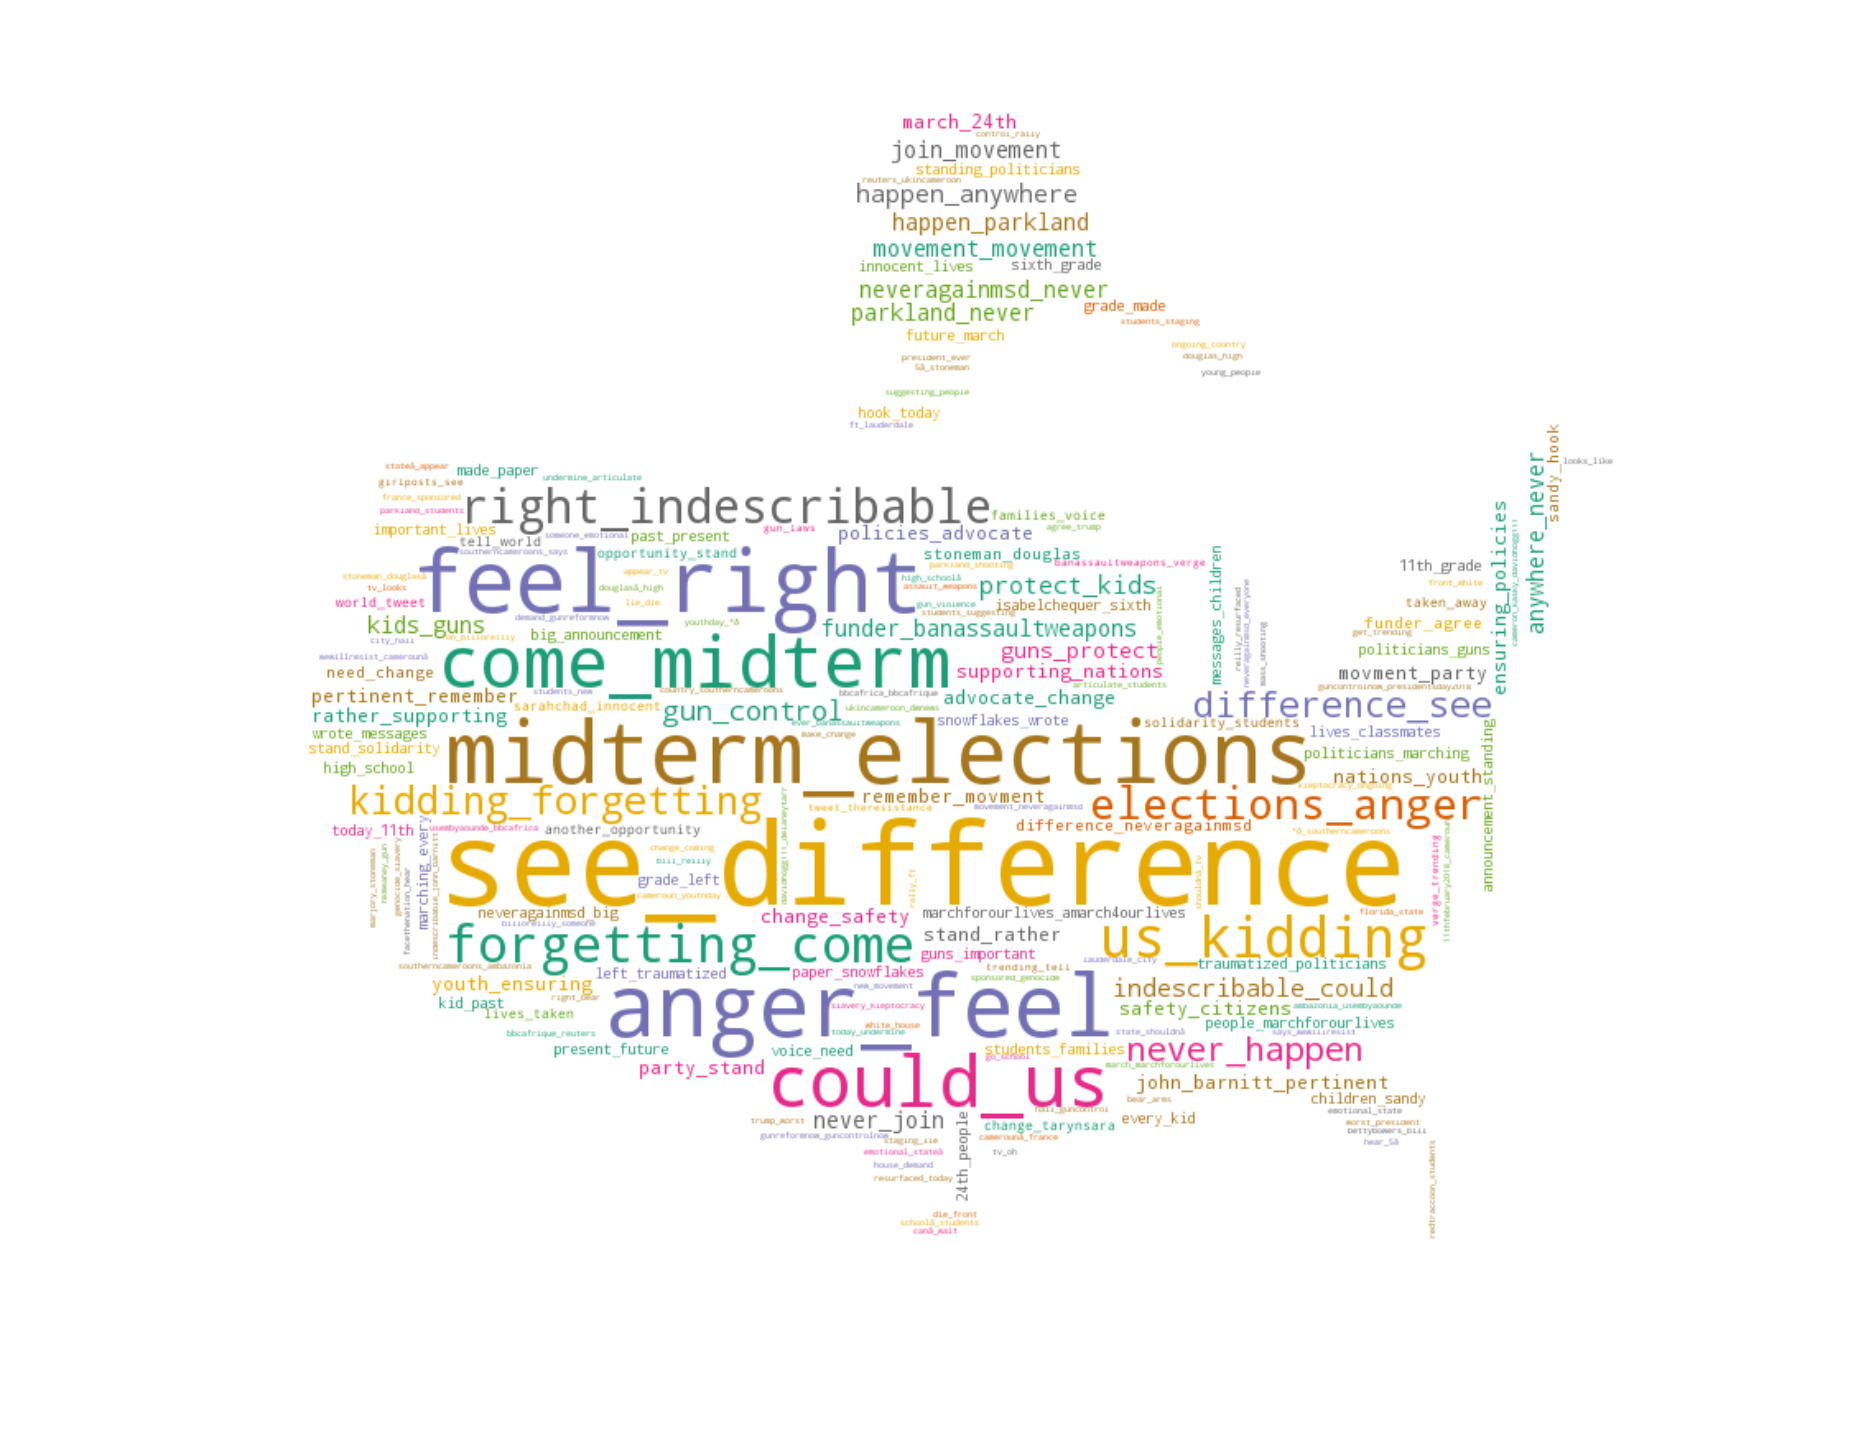

In [12]:
maskPath = '/N/u/klosteda/Carbonate/Text-Analysis/data/wordcloudMasks'
mask = np.array(Image.open(os.path.join(maskPath, "USA.png")))

text = df_C

stopwords = set(STOPWORDS)
stopwords.update(["columns", "rows", "kidding_forgetting"])

wc = wordcloud.WordCloud(background_color = "white", colormap = 'Dark2', mask = mask, stopwords=stopwords).generate_from_frequencies(text['freq'])
    
# show
plt.figure(figsize = (60, 20))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

plt.tight_layout()
    
# save graph as a png image to file
plt.savefig('/N/u/klosteda/Carbonate/Text-Analysis/Output/ngramWordcloudNeverAgain.png', format = 'png', dpi = 300, bbox_inches = 'tight')
    
    


plt.show()

## VOILA!!